In [59]:
import torch
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [23]:
# model

class Model(nn.Module):
    
    def __init__(self, input_size=1, hidden_size=100, output_size=1, num_layers=1):
        
        super(Model, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_size),
                            torch.zeros(1,1,self.hidden_size))
    
    #  methods 
    def forward(self, x):
        
        out, self.hidden_cell = self.lstm(x)
        out = self.linear(out.view(len(x), -1))
        
        return out[-1]

In [ ]:
# training

import torch.optim as optim

def run_epochs(model,loss_f,loader, max_epochs):    
    
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(max_epochs):
        
        model.train()
        for X_batch, y_batch in loader:
            
            y_pred = modlel(X_batch)
            loss = loss_f(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # validation
            if epoch % 100 != 0:
                continue
            
            model.eval()
            with torch.no_grad():
                
                y_pred = model(X_train)
                train_rmse = np.sqrt(loss_f(y_pred, y_train))
                
                y_pred = model(X_test)
                test_rmse = np.sqrt(loss_fn(y_pred, y_test))
                print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, 
                                                                     train_rmse, 
                                                                     test_rmse))

In [3]:
# example

flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
all_data = flight_data['passengers'].values.astype(float)

In [7]:
all_data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [8]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [9]:
train_data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.])

In [10]:
test_data

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))
train_data_normalized 

array([[-0.96483516],
       [-0.93846154],
       [-0.87692308],
       [-0.89010989],
       [-0.92527473],
       [-0.86373626],
       [-0.80659341],
       [-0.80659341],
       [-0.85934066],
       [-0.93406593],
       [-1.        ],
       [-0.93846154],
       [-0.95164835],
       [-0.9032967 ],
       [-0.83736264],
       [-0.86373626],
       [-0.90769231],
       [-0.8021978 ],
       [-0.70989011],
       [-0.70989011],
       [-0.76263736],
       [-0.87252747],
       [-0.95604396],
       [-0.84175824],
       [-0.81978022],
       [-0.7978022 ],
       [-0.67472527],
       [-0.74065934],
       [-0.7010989 ],
       [-0.67472527],
       [-0.58241758],
       [-0.58241758],
       [-0.64835165],
       [-0.74505495],
       [-0.81538462],
       [-0.72747253],
       [-0.70549451],
       [-0.66593407],
       [-0.60879121],
       [-0.66153846],
       [-0.65274725],
       [-0.4989011 ],
       [-0.44615385],
       [-0.39340659],
       [-0.53846154],
       [-0

In [14]:
train_data_normalized = torch.FloatTensor(train_data_normalized)
train_data_normalized

tensor([[-0.9648],
        [-0.9385],
        [-0.8769],
        [-0.8901],
        [-0.9253],
        [-0.8637],
        [-0.8066],
        [-0.8066],
        [-0.8593],
        [-0.9341],
        [-1.0000],
        [-0.9385],
        [-0.9516],
        [-0.9033],
        [-0.8374],
        [-0.8637],
        [-0.9077],
        [-0.8022],
        [-0.7099],
        [-0.7099],
        [-0.7626],
        [-0.8725],
        [-0.9560],
        [-0.8418],
        [-0.8198],
        [-0.7978],
        [-0.6747],
        [-0.7407],
        [-0.7011],
        [-0.6747],
        [-0.5824],
        [-0.5824],
        [-0.6484],
        [-0.7451],
        [-0.8154],
        [-0.7275],
        [-0.7055],
        [-0.6659],
        [-0.6088],
        [-0.6615],
        [-0.6527],
        [-0.4989],
        [-0.4462],
        [-0.3934],
        [-0.5385],
        [-0.6176],
        [-0.7011],
        [-0.6044],
        [-0.5956],
        [-0.5956],
        [-0.4198],
        [-0.4242],
        [-0.

In [17]:
train_window = 12

In [19]:
train_inout_seq = []
L = len(train_data_normalized)
for i in range(L-train_window):
    train_seq = train_data_normalized[i:i+train_window]
    train_label = train_data_normalized[i+train_window:i+train_window+1]
    train_inout_seq.append((train_seq ,train_label))

In [20]:
train_inout_seq

[(tensor([[-0.9648],
          [-0.9385],
          [-0.8769],
          [-0.8901],
          [-0.9253],
          [-0.8637],
          [-0.8066],
          [-0.8066],
          [-0.8593],
          [-0.9341],
          [-1.0000],
          [-0.9385]]),
  tensor([[-0.9516]])),
 (tensor([[-0.9385],
          [-0.8769],
          [-0.8901],
          [-0.9253],
          [-0.8637],
          [-0.8066],
          [-0.8066],
          [-0.8593],
          [-0.9341],
          [-1.0000],
          [-0.9385],
          [-0.9516]]),
  tensor([[-0.9033]])),
 (tensor([[-0.8769],
          [-0.8901],
          [-0.9253],
          [-0.8637],
          [-0.8066],
          [-0.8066],
          [-0.8593],
          [-0.9341],
          [-1.0000],
          [-0.9385],
          [-0.9516],
          [-0.9033]]),
  tensor([[-0.8374]])),
 (tensor([[-0.8901],
          [-0.9253],
          [-0.8637],
          [-0.8066],
          [-0.8066],
          [-0.8593],
          [-0.9341],
          [-1.0000]

In [22]:
len(train_inout_seq)

120

In [26]:
# example
input_size=1
hidden_size= 100 
output_size=1
num_layers=1

model = Model(input_size, hidden_size, output_size, num_layers)
#model(train_inout_seq)

# print(x)
# print(model(x))

In [27]:
epochs = 150
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_size),
                             torch.zeros(1, 1, model.hidden_size))
 
        y_pred = model(seq)
 
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
 
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
 
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

d:\10_python\python-3.8.2\python\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   1 loss: 0.00796474
epoch:  26 loss: 0.01294676
epoch:  51 loss: 0.00248024
epoch:  76 loss: 0.00544189
epoch: 101 loss: 0.00006160
epoch: 126 loss: 0.00657030
epoch: 149 loss: 0.0038274738


In [53]:
fut_pred = 12
 
test_inputs = train_data_normalized[-train_window:].tolist()

print(test_inputs)

[[0.12527473270893097], [0.04615384712815285], [0.3274725377559662], [0.2835164964199066], [0.3890109956264496], [0.6175824403762817], [0.9516483545303345], [1.0], [0.5780220031738281], [0.33186814188957214], [0.13406594097614288], [0.32307693362236023]]


In [54]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        test_inputs.append([model(seq).item()])


In [57]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[426.5293383 ]
 [446.34729335]
 [508.16709006]
 [548.52142552]
 [582.4946695 ]
 [609.33107936]
 [624.69033861]
 [612.68849516]
 [598.69958812]
 [579.89290142]
 [580.78325474]
 [612.42678607]]


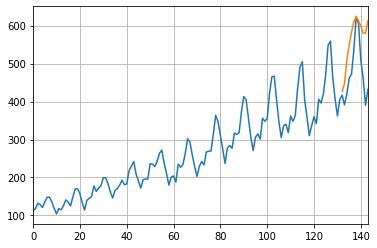

In [61]:
x = np.arange(132, 144, 1)
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()